# 1. Setup Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 2. Load Dataset


In [2]:
df = pd.read_csv('/content/House2_data.csv')
pd

<module 'pandas' from '/usr/local/lib/python3.12/dist-packages/pandas/__init__.py'>

# 3. Data Understanding


In [3]:
print("Data shape:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

# Cek 5 baris pertama
print("\nPreview data:")
print(df.head())

# Convert Time ke datetime
df["Time"] = pd.to_datetime(df["Time"])

Data shape: (8760, 21)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    8760 non-null   object 
 1   Winter                  8760 non-null   int64  
 2   Spring                  8760 non-null   int64  
 3   Summer                  8760 non-null   int64  
 4   Fall                    8760 non-null   int64  
 5   Outdoor Temp (°C)       8760 non-null   float64
 6   Humidity (%)            8760 non-null   float64
 7   Cloud Cover (%)         8760 non-null   float64
 8   Occupancy               8760 non-null   int64  
 9   Special Equipment [kW]  8760 non-null   float64
 10  Lighting [kW]           8760 non-null   float64
 11  HVAC [kW]               8760 non-null   float64
 12  Hour                    8760 non-null   int64  
 13  DayOfWeek               8760 non-null   int64  
 14  Mo

# 4. Exploratory Data Analysis (EDA)


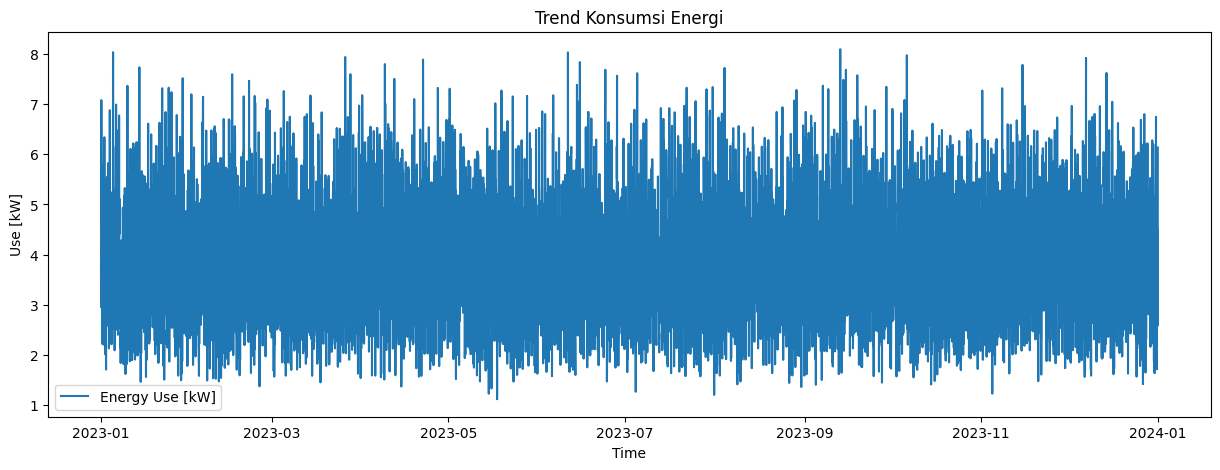

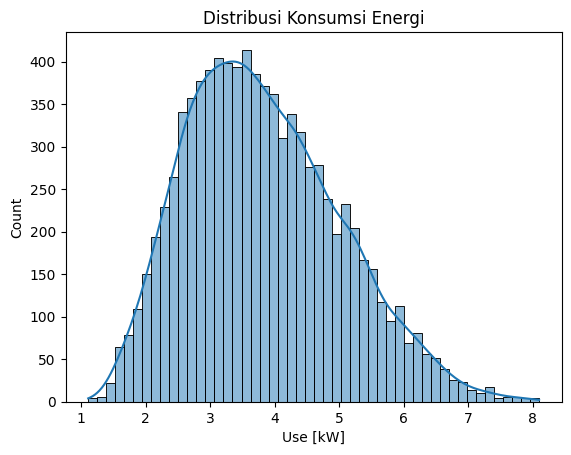

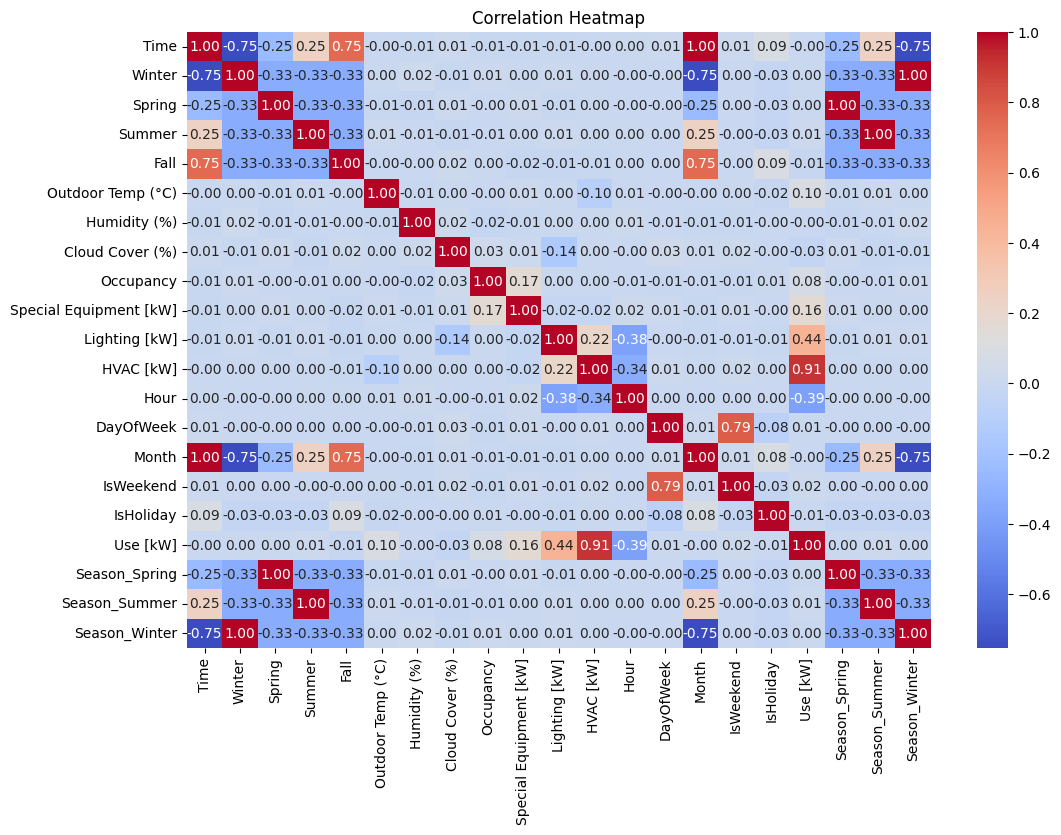

In [4]:
# Plot konsumsi energi
plt.figure(figsize=(15,5))
plt.plot(df["Time"], df["Use [kW]"], label="Energy Use [kW]")
plt.xlabel("Time")
plt.ylabel("Use [kW]")
plt.title("Trend Konsumsi Energi")
plt.legend()
plt.show()

# Distribusi target
sns.histplot(df["Use [kW]"], bins=50, kde=True)
plt.title("Distribusi Konsumsi Energi")
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Data Cleaning


In [5]:
# Cek missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Jika ada missing, bisa isi dengan interpolasi/mean
df.fillna(method="ffill", inplace=True)  # contoh forward fill

# Rename kolom dengan karakter aneh
df.rename(columns={"Outdoor Temp (Â°C)": "Outdoor Temp (°C)"}, inplace=True)



Missing values per column:
Time                      0
Winter                    0
Spring                    0
Summer                    0
Fall                      0
Outdoor Temp (°C)         0
Humidity (%)              0
Cloud Cover (%)           0
Occupancy                 0
Special Equipment [kW]    0
Lighting [kW]             0
HVAC [kW]                 0
Hour                      0
DayOfWeek                 0
Month                     0
IsWeekend                 0
IsHoliday                 0
Use [kW]                  0
Season_Spring             0
Season_Summer             0
Season_Winter             0
dtype: int64


/tmp/ipython-input-1844523094.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # contoh forward fill


# 6. Feature Selection


In [6]:
features = [
    "Outdoor Temp (°C)", "Humidity (%)", "Cloud Cover (%)",
    "Occupancy", "Special Equipment [kW]", "Lighting [kW]", "HVAC [kW]",
    "Hour", "DayOfWeek", "Month", "IsWeekend", "IsHoliday",
    "Season_Spring", "Season_Summer", "Season_Winter"
]
target = "Use [kW]"

X = df[features]
y = df[target]

# 7. Split Data


In [7]:
# Untuk time-series, jangan shuffle
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (7008, 15)
Test size: (1752, 15)


# 8. Train Model


In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 9. Evaluation


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# Plot Prediksi vs Aktual
plt.figure(figsize=(12,6))
plt.plot(df["Time"][train_size:], y_test.values, label="Actual", color="blue")
plt.plot(df["Time"][train_size:], y_pred, label="Predicted", color="red", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Use [kW]")
plt.title("Prediksi vs Aktual Konsumsi Energi")
plt.legend()
plt.show()


# 10. Feature Importance


In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_idx], align="center")
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.title("Feature Importance")
plt.show()

# =========================
# 11. Save Model
# =========================
joblib.dump(model, "rf_energy_model.pkl")
print("Model disimpan sebagai rf_energy_model.pkl")

#Testing

In [ ]:
import joblib
import pandas as pd

# Load model
model = joblib.load("rf_energy_model.pkl")

# Contoh data baru (bisa dari sensor atau file lain)
new_data = pd.DataFrame([{
    "Outdoor Temp (°C)": 29,
    "Humidity (%)": 60,
    "Cloud Cover (%)": 40,
    "Occupancy": 50,
    "Special Equipment [kW]": 12,
    "Lighting [kW]": 8,
    "HVAC [kW]": 15,
    "Hour": 14,
    "DayOfWeek": 2,
    "Month": 9,
    "IsWeekend": 0,
    "IsHoliday": 0,
    "Season_Spring": 0,
    "Season_Summer": 1,
    "Season_Winter": 0
}])

# Prediksi konsumsi energi
prediction = model.predict(new_data)
print("Prediksi penggunaan energi [kW]:", prediction[0])
